# Identification of Customer Segments

In this project, I applied unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments are used to direct marketing campaigns toward audiences with the highest expected return rate. Bertelsmann Arvato Analytics has provided the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns




In [3]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_table('AZDIAS_Feature_Summary.csv',sep=';')

In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.head(3)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0


In [214]:
feat_info.head(3)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"


In [215]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [216]:
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,FINANZ_VORSORGER,person,ordinal,[-1]
freq,1,43,49,26


In [217]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. I used this file to help make cleaning decisions during this stage of the project. 
#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. 

In [218]:
for columns in range(len(feat_info)):
    column_name=azdias.columns[columns]
    miss_l = feat_info.iloc[columns,3].replace('[', '').replace(']', '').split(',')
    if len(miss_l[0]) > 0:
        for el in miss_l:
            if azdias[column_name].dtype =='object':
                azdias.loc[azdias[column_name]==el,column_name]=np.nan 
            else:   
                el=int(el)
                azdias.loc[azdias[column_name]==el,column_name]=np.nan
    else:
        continue
        

In [219]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [220]:
print(azdias.isnull().sum())

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. I want to use matplotlib'function to visualize the distribution of missing value counts to find these columns. 

In [221]:
# Performing an assessment of how much missing data there is in each column of the
# dataset.
missing_per_col = azdias.isnull().sum()/len(azdias)
missing_per_col.head(50)

AGER_TYP                 0.769554
ALTERSKATEGORIE_GROB     0.003233
ANREDE_KZ                0.000000
CJT_GESAMTTYP            0.005446
FINANZ_MINIMALIST        0.000000
FINANZ_SPARER            0.000000
FINANZ_VORSORGER         0.000000
FINANZ_ANLEGER           0.000000
FINANZ_UNAUFFAELLIGER    0.000000
FINANZ_HAUSBAUER         0.000000
FINANZTYP                0.000000
GEBURTSJAHR              0.440203
GFK_URLAUBERTYP          0.005446
GREEN_AVANTGARDE         0.000000
HEALTH_TYP               0.124768
LP_LEBENSPHASE_FEIN      0.109549
LP_LEBENSPHASE_GROB      0.106115
LP_FAMILIE_FEIN          0.087287
LP_FAMILIE_GROB          0.087287
LP_STATUS_FEIN           0.005446
LP_STATUS_GROB           0.005446
NATIONALITAET_KZ         0.121536
PRAEGENDE_JUGENDJAHRE    0.121366
RETOURTYP_BK_S           0.005446
SEMIO_SOZ                0.000000
SEMIO_FAM                0.000000
SEMIO_REL                0.000000
SEMIO_MAT                0.000000
SEMIO_VERT               0.000000
SEMIO_LUST    

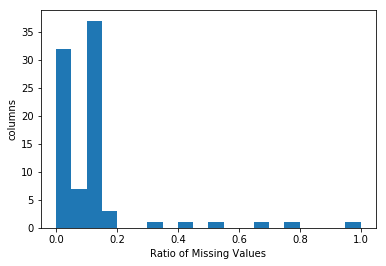

In [222]:
# Investigation patterns in the amount of missing data in each column.
plt.hist(missing_per_col, bins=20)
plt.ylabel('columns')
plt.xlabel('Ratio of Missing Values')
plt.show()

In [223]:
# Removinge the outlier columns from the dataset. 
missed_per_column = missing_per_col [missing_per_col > 0.3]
coloumns_to_drop = missed_per_column.index.tolist()
coloumns_to_drop


['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX']

In [224]:
azdias = azdias.drop(coloumns_to_drop, axis=1)

In [225]:
azdias.head(3)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0


#### Discussion 1.1.2: Assess Missing Data in Each Column

Most of the columns have less than 0.17 missing values. It's questionable that columns with missing values will give us a noticeable advantage. So we are droping columns 'AGER_TYP',  'GEBURTSJAHR',  'TITEL_KZ',  'ALTER_HH',  'KK_KUNDENTYP', and 'KBA05_BAUMAX'.
Talking about patterns, it's evident that some of the columns have the same missing ratio, for example, CAMEO_DEUG_2015, CAMEO_DEU_2015, and CAMEO_INTL_2015. They are presenting the same information in different dimensions.

#### Step 1.1.3: Assess Missing Data in Each Row

In [226]:
# How much data is missing in each row of the dataset?
missing_in_row = azdias.isnull().sum(axis=1)
total_r_with_missed_v = missing_in_row[missing_in_row>0].count()
total_r_with_missed_v

268012

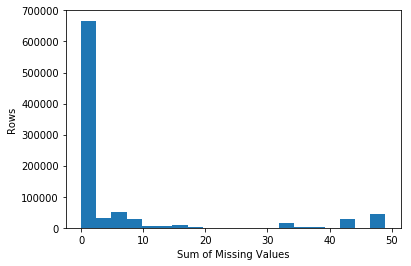

In [227]:
plt.hist(missing_in_row, bins=20)
plt.ylabel('Rows')
plt.xlabel('Sum of Missing Values')
plt.show()

In [228]:
# Rows quantity with more than 9 missed values per row.
total_r_with_missed_v_3 = missing_in_row[missing_in_row>3].count()
total_r_with_missed_v_3

206719

In [229]:
# Rows quantity with more than 9 missed values per row.
total_r_with_missed_v_9 = missing_in_row[missing_in_row>9].count()
total_r_with_missed_v_9

116478

Taking into account the above plot and the fact that with 9 missed values we will have 2 times fewer dropped rows, I decided to go further with a maximum of 9 missed values per row.

In [230]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
azdias_high_missing = azdias[azdias.isnull().sum(axis=1) > 9]
azdias_low_missing = azdias[azdias.isnull().sum(axis=1) <= 9]



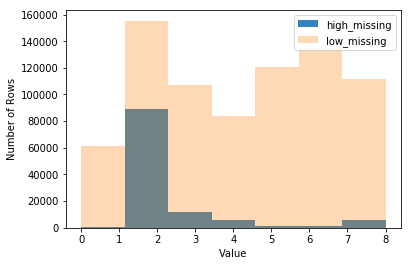

In [231]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
bins = np.linspace(0, 8, 8)

pyplot.hist(azdias_high_missing['SEMIO_SOZ'], bins, alpha=0.9, label='high_missing')
pyplot.hist(azdias_low_missing['SEMIO_SOZ'], bins, alpha=0.3, label='low_missing')
pyplot.legend(loc='upper right')
pyplot.ylabel('Number of Rows')
pyplot.xlabel('Value')
pyplot.show()



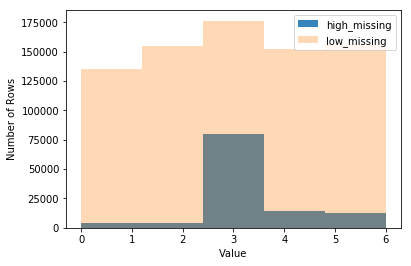

In [232]:
bins = np.linspace(0, 6, 6)

pyplot.hist(azdias_high_missing['FINANZ_MINIMALIST'], bins, alpha=0.9, label='high_missing')
pyplot.hist(azdias_low_missing['FINANZ_MINIMALIST'], bins, alpha=0.3, label='low_missing')
pyplot.legend(loc='upper right')
pyplot.ylabel('Number of Rows')
pyplot.xlabel('Value')
pyplot.show()



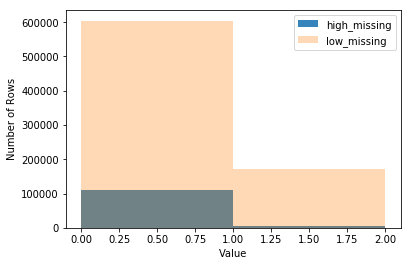

In [233]:
bins = np.linspace(0, 2, 3)

pyplot.hist(azdias_high_missing['GREEN_AVANTGARDE'], bins, alpha=0.9, label='high_missing')
pyplot.hist(azdias_low_missing['GREEN_AVANTGARDE'], bins, alpha=0.3, label='low_missing')
pyplot.legend(loc='upper right')
pyplot.ylabel('Number of Rows')
pyplot.xlabel('Value')
pyplot.show()


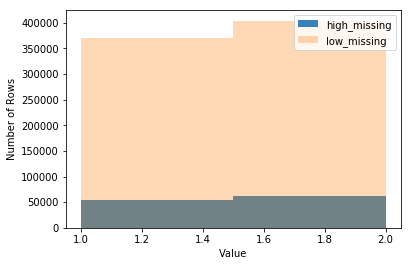

In [234]:
bins = np.linspace(1 , 2, 3)

pyplot.hist(azdias_high_missing['ANREDE_KZ'], bins, alpha=0.9, label='high_missing')
pyplot.hist(azdias_low_missing['ANREDE_KZ'], bins, alpha=0.3, label='low_missing')
pyplot.legend(loc='upper right')
pyplot.ylabel('Number of Rows')
pyplot.xlabel('Value')
pyplot.show()



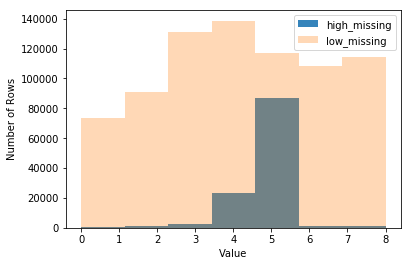

In [235]:
bins = np.linspace(0, 8, 8)

pyplot.hist(azdias_high_missing['SEMIO_PFLICHT'], bins, alpha=0.9, label='high_missing')
pyplot.hist(azdias_low_missing['SEMIO_PFLICHT'], bins, alpha=0.3, label='low_missing')
pyplot.legend(loc='upper right')
pyplot.ylabel('Number of Rows')
pyplot.xlabel('Value')
pyplot.show()



#### Discussion 1.1.3: Assess Missing Data in Each Row

Some columns have the same distribution in both subsets: ANREDE_KZ,GREEN_AVANTGARDE, FINANZ_MINIMALIST. One column has a slightly different distribution but has the same mode:SEMIO_SOZ. And one of them have significantly other distribution:  SEMIO_PFLICHT even has a different mode.

### Step 1.2: Select and Re-Encode Features

In [236]:
# How many features are there of each data type?
feat_info.groupby(['type'])['attribute'].count()


type
categorical    21
interval        1
mixed           7
numeric         7
ordinal        49
Name: attribute, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [237]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded
actual_features = list(azdias_low_missing.columns)
actual_features


['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'PRAEGENDE_JUGENDJAHRE',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'GEBAEUDETYP',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'WOHNLAGE',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'CAMEO_INTL_2015',
 'KBA05_ANTG1',
 'K

In [238]:
categorical_f = feat_info[feat_info['attribute'].isin(actual_features) & (feat_info['type'] == 'categorical')]
categorical_f

,attribute,information_level,type,missing_or_unknown
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]
21,NATIONALITAET_KZ,person,categorical,"[-1,0]"


In [239]:
categorical_columns = categorical_f['attribute']
categorical_columns

2            ANREDE_KZ
3        CJT_GESAMTTYP
10           FINANZTYP
12     GFK_URLAUBERTYP
13    GREEN_AVANTGARDE
17     LP_FAMILIE_FEIN
18     LP_FAMILIE_GROB
19      LP_STATUS_FEIN
20      LP_STATUS_GROB
21    NATIONALITAET_KZ
38         SHOPPER_TYP
39             SOHO_KZ
41            VERS_TYP
42            ZABEOTYP
52         GEBAEUDETYP
55         OST_WEST_KZ
57     CAMEO_DEUG_2015
58      CAMEO_DEU_2015
Name: attribute, dtype: object

In [240]:
values_q = azdias_low_missing[categorical_columns].nunique()  #quantity of unique values
values_q

ANREDE_KZ            2
CJT_GESAMTTYP        6
FINANZTYP            6
GFK_URLAUBERTYP     12
GREEN_AVANTGARDE     2
LP_FAMILIE_FEIN     11
LP_FAMILIE_GROB      5
LP_STATUS_FEIN      10
LP_STATUS_GROB       5
NATIONALITAET_KZ     3
SHOPPER_TYP          4
SOHO_KZ              2
VERS_TYP             2
ZABEOTYP             6
GEBAEUDETYP          7
OST_WEST_KZ          2
CAMEO_DEUG_2015      9
CAMEO_DEU_2015      44
dtype: int64

In [241]:
binary_cat = values_q.where(values_q  == 2)[values_q.where(values_q   == 2).notna()].index.tolist()
binary_cat #binary categorical variables

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

In [242]:
multilevel_cat =  values_q.where(values_q  > 2)[values_q.where(values_q   > 2).notna()].index.tolist()
multilevel_cat

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [243]:
# List of multilevel categorical variables, which I will keep:
multilevel_to_keep = values_q.where((values_q  > 2) & (values_q  < 7) )[values_q.where((values_q   > 2) & (values_q  < 7)).notna()].index.tolist()
multilevel_to_keep

['CJT_GESAMTTYP',
 'FINANZTYP',
 'LP_FAMILIE_GROB',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP']

In [244]:
# List of multilevel categorical variables, which I will drop:
multilevel_to_drop = list(set(multilevel_cat).difference(set(multilevel_to_keep)))
multilevel_to_drop

['GEBAEUDETYP',
 'LP_STATUS_FEIN',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN']

In [245]:
for el in binary_cat + multilevel_to_keep:
    print('column: ', el, 'values: ', azdias_low_missing[el].unique())

column:  ANREDE_KZ values:  [ 2.  1.]
column:  GREEN_AVANTGARDE values:  [0 1]
column:  SOHO_KZ values:  [ 1.  0.]
column:  VERS_TYP values:  [  2.   1.  nan]
column:  OST_WEST_KZ values:  ['W' 'O']
column:  CJT_GESAMTTYP values:  [ 5.  3.  2.  4.  1.  6.]
column:  FINANZTYP values:  [ 1.  6.  5.  2.  4.  3.]
column:  LP_FAMILIE_GROB values:  [  3.   1.  nan   5.   2.   4.]
column:  LP_STATUS_GROB values:  [ 1.  2.  4.  5.  3.]
column:  NATIONALITAET_KZ values:  [  1.   3.   2.  nan]
column:  SHOPPER_TYP values:  [  3.   2.   1.   0.  nan]
column:  ZABEOTYP values:  [ 5.  3.  4.  1.  6.  2.]


In [246]:
azdias_clean = azdias_low_missing.copy()

In [247]:
#drop
for el in multilevel_to_drop:
    azdias_clean=azdias_clean.drop(el, axis=1)

In [248]:
# Re-encoding binary cat variable to be kept in the analysis.

OST_WEST_KZ_reenc = {'W': 1, 'O': 0}
azdias_clean = azdias_clean.replace({'OST_WEST_KZ':OST_WEST_KZ_reenc})

In [249]:
#Hot encode multilevel variables:
for el in multilevel_to_keep:
    el_dummies = pd.get_dummies(azdias_clean[el], prefix=el)
    azdias_clean = pd.concat([azdias_clean, el_dummies], axis=1)
azdias_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_1.0,ZABEOTYP_2.0,ZABEOTYP_3.0,ZABEOTYP_4.0,ZABEOTYP_5.0,ZABEOTYP_6.0
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,0,0,0,1,0,0,0,0,1,0
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,0,0,1,0,0,0,0,0,1,0
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,0,1,0,0,0,0,1,0,0,0
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,0,0,1,0,0,0,0,1,0,0
5,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,2.0,...,1,0,0,0,0,0,0,1,0,0


In [250]:
#Drop multilevel:
for el in multilevel_to_keep:
    azdias_clean=azdias_clean.drop(el, axis=1)
azdias_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_1.0,ZABEOTYP_2.0,ZABEOTYP_3.0,ZABEOTYP_4.0,ZABEOTYP_5.0,ZABEOTYP_6.0
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,1,0,0,0,0,1,0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,1,0,0,0,0,0,1,0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,1,0,0,0,0,1,0,0,0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,1,0,0,0,0,1,0,0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,1,0,0,0,0,0,0,1,0,0


#### Discussion 1.2.1: Re-Encode Categorical Features

I re-encoded the binary feature 'OST_WEST_KZ'. Then I decided to keep all multi-level categorical features with less than seven distinct values 'CJT_GESAMTTYP',  'FINANZTYP',  'LP_FAMILIE_GROB',  'LP_STATUS_GROB',  'NATIONALITAET_KZ',  'SHOPPER_TYP',  'ZABEOTYP'. Then I dropped all other multi-level features:'CAMEO_DEUG_2015',  'LP_STATUS_FEIN',  'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN',  'GEBAEUDETYP',  'CAMEO_DEU_2015'.


#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). 
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. 

In [251]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
# new varibales: 'MAINSTREAM_AVANTGARDE' and DECADE
azdias_clean.loc[azdias_clean['PRAEGENDE_JUGENDJAHRE'].isin([1,3,5,8,10,12,14]),'MAINSTREAM_AVANTGARDE']=2
azdias_clean.loc[azdias_clean['PRAEGENDE_JUGENDJAHRE'].isin([2,4,6,7,9,11,13,15]),'MAINSTREAM_AVANTGARDE']=1

azdias_clean.loc[azdias_clean['PRAEGENDE_JUGENDJAHRE'].isin([1,2]),'DECADE']=70
azdias_clean.loc[azdias_clean['PRAEGENDE_JUGENDJAHRE'].isin([3,4]),'DECADE']=60
azdias_clean.loc[azdias_clean['PRAEGENDE_JUGENDJAHRE'].isin([5,6,7]),'DECADE']=50
azdias_clean.loc[azdias_clean['PRAEGENDE_JUGENDJAHRE'].isin([8,9]),'DECADE']=40
azdias_clean.loc[azdias_clean['PRAEGENDE_JUGENDJAHRE'].isin([10,11,12,13]),'DECADE']=30
azdias_clean.loc[azdias_clean['PRAEGENDE_JUGENDJAHRE'].isin([14,15]),'DECADE']=20
azdias_clean.head()


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_1.0,ZABEOTYP_2.0,ZABEOTYP_3.0,ZABEOTYP_4.0,ZABEOTYP_5.0,ZABEOTYP_6.0,MAINSTREAM_AVANTGARDE,DECADE
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,1,0,0,0,0,1,0,2.0,20.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,1,0,0,0,0,0,1,0,1.0,20.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,1,0,0,0,2.0,40.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,1,0,0,0,0,1,0,0,2.0,40.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,1,0,0,2.0,60.0


In [252]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
# new varibales: 'FAMILY_WEALTH' and FAMILY_LIFE_STAGE
azdias_clean.loc[azdias_clean['CAMEO_INTL_2015'].isin(['51','52','53','54','55']),'FAMILY_WEALTH']=1
azdias_clean.loc[azdias_clean['CAMEO_INTL_2015'].isin(['41','42','43','44','45']),'FAMILY_WEALTH']=2
azdias_clean.loc[azdias_clean['CAMEO_INTL_2015'].isin(['31','32','33','34','35']),'FAMILY_WEALTH']=3
azdias_clean.loc[azdias_clean['CAMEO_INTL_2015'].isin(['21','22','23','24','25']),'FAMILY_WEALTH']=4
azdias_clean.loc[azdias_clean['CAMEO_INTL_2015'].isin(['11','12','13','14','15']),'FAMILY_WEALTH']=5

azdias_clean.loc[azdias_clean['CAMEO_INTL_2015'].isin(['11','21','31','41','51']),'FAMILY_LIFE_STAGE']=1
azdias_clean.loc[azdias_clean['CAMEO_INTL_2015'].isin(['12','22','32','42','52']),'FAMILY_LIFE_STAGE']=2
azdias_clean.loc[azdias_clean['CAMEO_INTL_2015'].isin(['13','23','33','43','53']),'FAMILY_LIFE_STAGE']=3
azdias_clean.loc[azdias_clean['CAMEO_INTL_2015'].isin(['14','24','34','44','54']),'FAMILY_LIFE_STAGE']=4
azdias_clean.loc[azdias_clean['CAMEO_INTL_2015'].isin(['15','25','35','45','55']),'FAMILY_LIFE_STAGE']=5

azdias_clean.head()



,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,ZABEOTYP_1.0,ZABEOTYP_2.0,ZABEOTYP_3.0,ZABEOTYP_4.0,ZABEOTYP_5.0,ZABEOTYP_6.0,MAINSTREAM_AVANTGARDE,DECADE,FAMILY_WEALTH,FAMILY_LIFE_STAGE
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,1,0,2.0,20.0,1.0,1.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,1,0,1.0,20.0,4.0,4.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,1,0,0,0,2.0,40.0,5.0,2.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,1,0,0,2.0,40.0,2.0,3.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,1,0,0,2.0,60.0,1.0,4.0


#### Discussion 1.2.2: Engineer Mixed-Type Features

I decided to keep two mixed features: PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 and drop all others. I created four new features and assigned them new matching values using Data_Dictionary.md as a reference to perform the above. I will drop all mixed on the next step.

#### Step 1.2.3: Complete Feature Selection

In [254]:
mixed_to_drop = feat_info[feat_info['attribute'].isin(actual_features) & \
                          (feat_info['type'] == 'mixed')]['attribute'].tolist()

for el in mixed_to_drop:
    azdias_clean.drop(el, axis=1, inplace=True)
azdias_clean.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,ZABEOTYP_1.0,ZABEOTYP_2.0,ZABEOTYP_3.0,ZABEOTYP_4.0,ZABEOTYP_5.0,ZABEOTYP_6.0,MAINSTREAM_AVANTGARDE,DECADE,FAMILY_WEALTH,FAMILY_LIFE_STAGE
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,1,0,2.0,20.0,1.0,1.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,1,0,1.0,20.0,4.0,4.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,1,0,0,0,2.0,40.0,5.0,2.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,1,0,0,2.0,40.0,2.0,3.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,1,0,0,2.0,60.0,1.0,4.0


### Step 1.3: Creation a Cleaning Function

In [255]:
def clean_data(df, multil_to_keep, coloumns_to_drop, categorical_columns, binary_cat, multilevel_cat, max_missing = 9):

    """
   
    INPUT: Demographics DataFrame, list of: columns to drop, categorical columns, \
    binary features, mulilevel, max quantity of missed values in a row
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for columns in range(len(feat_info)):
        column_name=df.columns[columns]
        #print(column_name)
        miss_l = feat_info.iloc[columns,3].replace('[', '').replace(']', '').split(',')
        if len(miss_l[0]) > 0:
            for el in miss_l:
                if df[column_name].dtype =='object':
                    df.loc[df[column_name]==el,column_name]=np.nan 
                else:   
                    el=int(el)
                    df.loc[df[column_name]==el,column_name]=np.nan
        else:
            continue
    
    
    # remove selected columns and rows, ...
    coloumns_to_drop = missed_per_column.index.tolist()
    df = df.drop(coloumns_to_drop, axis=1)
    missing_in_row = df.isnull().sum(axis=1)
    total_r_with_missed_v = missing_in_row[missing_in_row>0].count()
    df_low_missing = df[df.isnull().sum(axis=1) <= max_missing]
    # select, re-encode, and engineer column values.
    actual_features = list(df_low_missing.columns)
    categorical_columns = feat_info[feat_info['attribute'].isin(actual_features) & (feat_info['type'] == 'categorical')]['attribute']
    multilevel_to_drop = list(set(multilevel_cat).difference(set(multilevel_to_keep)))
    df_clean = df_low_missing.copy()
    # drop multilevel_to_drop:
    for el in multilevel_to_drop:
        df_clean=df_clean.drop(el, axis=1)

    #Re-encode binary cat variable to be kept in the analysis.
    OST_WEST_KZ_reenc = {'W': 1, 'O': 0}
    df_clean = df_clean.replace({'OST_WEST_KZ':OST_WEST_KZ_reenc})
        
    #Hot encode multilevel variables:
    for el in multilevel_to_keep:
        el_dummies = pd.get_dummies(df_clean[el], prefix=el)
        df_clean = pd.concat([df_clean, el_dummies], axis=1)
        df_clean=df_clean.drop(el, axis=1)
    
    # Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
    # new varibales: 'MAINSTREAM_AVANTGARDE' and DECADE
    df_clean.loc[df_clean['PRAEGENDE_JUGENDJAHRE'].isin([1,3,5,8,10,12,14]),'MAINSTREAM_AVANTGARDE']=2
    df_clean.loc[df_clean['PRAEGENDE_JUGENDJAHRE'].isin([2,4,6,7,9,11,13,15]),'MAINSTREAM_AVANTGARDE']=1

    df_clean.loc[df_clean['PRAEGENDE_JUGENDJAHRE'].isin([1,2]),'DECADE']=70
    df_clean.loc[df_clean['PRAEGENDE_JUGENDJAHRE'].isin([3,4]),'DECADE']=60
    df_clean.loc[df_clean['PRAEGENDE_JUGENDJAHRE'].isin([5,6,7]),'DECADE']=50
    df_clean.loc[df_clean['PRAEGENDE_JUGENDJAHRE'].isin([8,9]),'DECADE']=40
    df_clean.loc[df_clean['PRAEGENDE_JUGENDJAHRE'].isin([10,11,12,13]),'DECADE']=30
    df_clean.loc[df_clean['PRAEGENDE_JUGENDJAHRE'].isin([14,15]),'DECADE']=20
    
    # Investigate "CAMEO_INTL_2015" and engineer two new variables.
    # new varibales: 'FAMILY_WEALTH' and FAMILY_LIFE_STAGE
    df_clean.loc[df_clean['CAMEO_INTL_2015'].isin(['51','52','53','54','55']),'FAMILY_WEALTH']=1
    df_clean.loc[df_clean['CAMEO_INTL_2015'].isin(['41','42','43','44','45']),'FAMILY_WEALTH']=2
    df_clean.loc[df_clean['CAMEO_INTL_2015'].isin(['31','32','33','34','35']),'FAMILY_WEALTH']=3
    df_clean.loc[df_clean['CAMEO_INTL_2015'].isin(['21','22','23','24','25']),'FAMILY_WEALTH']=4
    df_clean.loc[df_clean['CAMEO_INTL_2015'].isin(['11','12','13','14','15']),'FAMILY_WEALTH']=5

    df_clean.loc[df_clean['CAMEO_INTL_2015'].isin(['11','21','31','41','51']),'FAMILY_LIFE_STAGE']=1
    df_clean.loc[df_clean['CAMEO_INTL_2015'].isin(['12','22','32','42','52']),'FAMILY_LIFE_STAGE']=2
    df_clean.loc[df_clean['CAMEO_INTL_2015'].isin(['13','23','33','43','53']),'FAMILY_LIFE_STAGE']=3
    df_clean.loc[df_clean['CAMEO_INTL_2015'].isin(['14','24','34','44','54']),'FAMILY_LIFE_STAGE']=4
    df_clean.loc[df_clean['CAMEO_INTL_2015'].isin(['15','25','35','45','55']),'FAMILY_LIFE_STAGE']=5

  
    mixed_to_drop = feat_info[feat_info['attribute'].isin(actual_features) & \
                              (feat_info['type'] == 'mixed')]['attribute'].tolist()

    for el in mixed_to_drop:
        df_clean.drop(el, axis=1, inplace=True)
    
    # Return the cleaned dataframe.
    
    return df_clean
    
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling



In [256]:
imputer = Imputer(strategy='most_frequent')
azdias_clean_imputed = pd.DataFrame(imputer.fit_transform(azdias_clean))
azdias_clean_imputed.columns = azdias_clean.columns
azdias_clean_imputed.index = azdias_clean.index

In [257]:
# Applying feature scaling to the general population demographics data.
scaler = StandardScaler() 
azdias_clean_scaled = scaler.fit_transform(azdias_clean_imputed)
azdias_clean_scaled = pd.DataFrame(azdias_clean_scaled)
azdias_clean_scaled.columns = azdias_clean_imputed.columns
azdias_clean_scaled.head(5)


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,ZABEOTYP_1.0,ZABEOTYP_2.0,ZABEOTYP_3.0,ZABEOTYP_4.0,ZABEOTYP_5.0,ZABEOTYP_6.0,MAINSTREAM_AVANTGARDE,DECADE,FAMILY_WEALTH,FAMILY_LIFE_STAGE
0,-1.765558,0.958422,-1.488785,1.540017,-1.044684,1.468541,0.981043,1.327209,-0.531136,1.007436,...,-0.425547,-0.202728,-0.741470,-0.594162,2.964463,-0.313275,0.531136,-1.106006,-1.170872,-1.249876
1,0.198811,0.958422,-1.488785,0.867244,-1.770775,-0.568811,0.263375,1.327209,1.882757,1.007436,...,-0.425547,-0.202728,-0.741470,-0.594162,2.964463,-0.313275,-1.882757,-1.106006,0.874330,0.763676
2,1.180995,0.958422,0.689233,-0.478302,1.133590,-0.568811,-1.171961,-0.818216,-0.531136,-0.315096,...,-0.425547,-0.202728,1.348673,-0.594162,-0.337329,-0.313275,0.531136,0.259273,1.556065,-0.578692
3,0.198811,-1.043381,0.689233,0.194471,0.407498,-1.247929,0.263375,-0.818216,-0.531136,1.007436,...,-0.425547,-0.202728,-0.741470,1.683042,-0.337329,-0.313275,0.531136,0.259273,-0.489138,0.092492
4,-1.765558,0.958422,-0.036773,-1.151076,1.133590,-0.568811,-0.454293,1.327209,-0.531136,1.007436,...,-0.425547,-0.202728,-0.741470,1.683042,-0.337329,-0.313275,0.531136,1.624552,-1.170872,0.763676


### Discussion 2.1: Apply Feature Scaling

- For simplicity, I used the Imputer with the mode in each column. Because it's the only imputer in such a case (when our data have both numerical and categorical values), in case we want to dive deeper and make imputations for categorical and numerical features separately, maybe median will work better for numerical data in our case, but I didn't try it. I'm sure that the mean will not work because most of the data is skewed.

- All features were scaled using the StandardScaler.

- In addition, I used feature scaling using the .fit_transform method.

### Step 2.2: Perform Dimensionality Reduction

In [258]:
# Applying PCA to the data.
pca = PCA(random_state = 17)
pca.fit(azdias_clean_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=17,
  svd_solver='auto', tol=0.0, whiten=False)

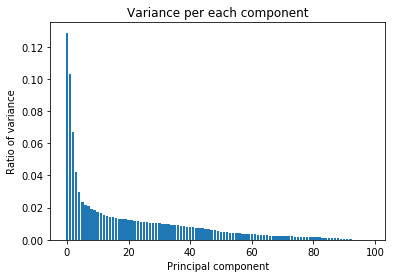

In [259]:
# Investigation the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance per each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance")
plt.show()


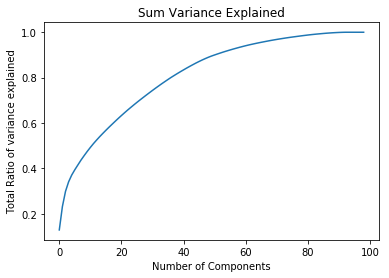

In [260]:

plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Sum Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Total Ratio of variance explained")
plt.show()


In [261]:
# Re-applying PCA to the data while selecting for number of components to retain.
sixty_comp_PCA = PCA(n_components=60)
azdias_reduced = sixty_comp_PCA.fit_transform(azdias_clean_scaled)

### Discussion 2.2: Perform Dimensionality Reduction

I decided to use 60 principal components, as it explained more than 90% variances alongside reducing the number of features by around 40%.

### Step 2.3: Interpret Principal Components


In [263]:
#function for getting weights of given component
def get_weights(pca_, i):
    df = pd.DataFrame(pca_.components_, columns=list(azdias_clean_scaled.columns))
    res = df.iloc[i].sort_values(ascending=False)
    return res

In [264]:
# Map the first pr component
pca_1 = get_weights(sixty_comp_PCA, 0)
print (pca_1)

LP_STATUS_GROB_1.0       0.202689
HH_EINKOMMEN_SCORE       0.185869
PLZ8_ANTG3               0.185262
PLZ8_ANTG4               0.178324
FINANZ_SPARER            0.171605
ORTSGR_KLS9              0.159440
EWDICHTE                 0.157838
FINANZTYP_1.0            0.150688
FINANZ_HAUSBAUER         0.139974
SEMIO_PFLICHT            0.135210
SEMIO_REL                0.130731
KBA05_ANTG4              0.127944
PLZ8_ANTG2               0.127132
KBA05_ANTG3              0.119743
ARBEIT                   0.114556
ANZ_HAUSHALTE_AKTIV      0.113830
SEMIO_RAT                0.113727
SEMIO_TRADV              0.109755
RELAT_AB                 0.109053
MAINSTREAM_AVANTGARDE    0.107932
FINANZ_UNAUFFAELLIGER    0.104580
FINANZ_ANLEGER           0.100833
ZABEOTYP_5.0             0.100712
SEMIO_MAT                0.087359
SEMIO_FAM                0.082293
SEMIO_KULT               0.081407
LP_FAMILIE_GROB_1.0      0.075024
ZABEOTYP_4.0             0.062485
NATIONALITAET_KZ_2.0     0.061384
REGIOTYP      

In [265]:
# Mapping weights for the second principal component to corresponding feature names
# and then printing the linked values, sorted by weight.
pca_2 = get_weights(sixty_comp_PCA, 1)
print (pca_2)


ALTERSKATEGORIE_GROB     0.213060
DECADE                   0.208547
ZABEOTYP_3.0             0.202341
FINANZ_VORSORGER         0.197492
SEMIO_ERL                0.185256
RETOURTYP_BK_S           0.151256
SEMIO_LUST               0.149937
FINANZ_HAUSBAUER         0.134588
W_KEIT_KIND_HH           0.124310
PLZ8_ANTG3               0.119352
PLZ8_ANTG4               0.113233
EWDICHTE                 0.108609
ORTSGR_KLS9              0.108292
CJT_GESAMTTYP_2.0        0.098818
SEMIO_KRIT               0.096839
FINANZTYP_5.0            0.092976
SEMIO_KAEM               0.092119
HH_EINKOMMEN_SCORE       0.089862
KBA05_ANTG4              0.088708
ARBEIT                   0.082772
PLZ8_ANTG2               0.081813
ANZ_HAUSHALTE_AKTIV      0.078659
RELAT_AB                 0.077805
LP_STATUS_GROB_1.0       0.075652
LP_FAMILIE_GROB_1.0      0.073600
SHOPPER_TYP_3.0          0.072914
FINANZTYP_2.0            0.071040
ANREDE_KZ                0.068180
KBA05_ANTG3              0.066344
CJT_GESAMTTYP_

In [266]:
# Mapping weights for the third principal component to corresponding feature names
# and then printing the linked values, sorted by weight.

pca_3 = get_weights(sixty_comp_PCA, 2)
print (pca_3)

SEMIO_VERT               0.324901
SEMIO_SOZ                0.257747
SEMIO_FAM                0.255558
SEMIO_KULT               0.241921
FINANZTYP_5.0            0.143759
FINANZ_MINIMALIST        0.128434
SHOPPER_TYP_0.0          0.124644
ZABEOTYP_1.0             0.101870
SEMIO_REL                0.096998
RETOURTYP_BK_S           0.092354
W_KEIT_KIND_HH           0.079654
DECADE                   0.079385
SEMIO_MAT                0.076585
FINANZ_VORSORGER         0.070607
ORTSGR_KLS9              0.063467
EWDICHTE                 0.063155
PLZ8_ANTG3               0.059573
PLZ8_ANTG4               0.058399
ZABEOTYP_6.0             0.054744
SHOPPER_TYP_1.0          0.049484
GREEN_AVANTGARDE         0.049451
ARBEIT                   0.041974
PLZ8_ANTG2               0.041775
RELAT_AB                 0.040300
ALTERSKATEGORIE_GROB     0.040143
SEMIO_LUST               0.038166
KBA05_ANTG4              0.033952
LP_STATUS_GROB_5.0       0.031894
ANZ_HAUSHALTE_AKTIV      0.030438
CJT_GESAMTTYP_

### Discussion 2.3: Interpret Principal Components


- PC # 1 deals with home and personal finance and is mainly based on the LP_STATUS_GROB_1.0, HH_EINKOMMEN_SCORE and PLZ8_ANTG3 (all of them have positive correlation) functions. Moreover, the higher the value of the component, the lower the income and social status. One of the features (FINANZ MINIMALIST -low financial interest ) has a high negative correlation, so it's logical: if the household is poor, it can not afford high loans.
- PC # 2 deals with personal characteristics: Age, habits, etc: ALTERSKATEGORIE_GROB, DECADE, FINANZ_VORSORGER (all of them have positive correlation) functions and some have negative correlation such as SEMIO_REL.
- PC # 3 also deals with personal characteristics, but here is an interesting point: gender (ANREDE_KZ) has a strong negative correlation, so if value of this PC is high, probably it's male (male = 1, female = 2).


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

In [268]:
# New version, much faster.
def get_k_mean_score_b(data, clusters_q):
    k_mean = MiniBatchKMeans(init="k-means++", n_clusters = clusters_q, n_init = 25, max_no_improvement=25, batch_size=256)
    model = k_mean.fit(data)
    score = np.abs(model.score(data))
    return score

In [269]:
scores = []
cl_n = range(4, 29, 4)
for el in cl_n:
    scores.append(get_k_mean_score_b(azdias_reduced, el))
    print(el,' completed')

4  completed
8  completed
12  completed
16  completed
20  completed
24  completed
28  completed


Text(0.5,1,'within-cluster distance vs. number of clusters')

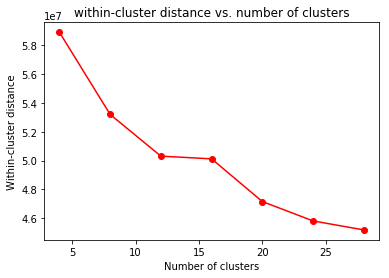

In [270]:
# Investigation of the change in within-cluster distance across number of clusters.

plt.plot(cl_n, scores, linestyle='-', marker='o', color='r');
plt.xlabel('Number of clusters');
plt.ylabel('Within-cluster distance');
plt.title('within-cluster distance vs. number of clusters')


In [271]:
# Re-fitting the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
k_mean = MiniBatchKMeans(init="k-means++", n_clusters = 24, n_init = 25, max_no_improvement=25, batch_size=256)
model = k_mean.fit(azdias_reduced)
azdias_reduced_pred = model.predict(azdias_reduced)


### Discussion 3.1: Applying Clustering to General Population

From the above plot, although with 24 clusters, we didn't get a plateau, As I can see, even a significant increase in the number of clusters above 24 will not get us such a significant decrease in distance. So, I decided to stay with 24 clusters.

### Step 3.2: Applying All Steps to the Customer Data


In [272]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',sep=';') 



In [273]:
#create pre_processing function old version
def preproces(df):
    # NaN
    imputer = Imputer(strategy='most_frequent')
    df_imputed = pd.DataFrame(imputer.fit_transform(df))
    df_imputed.columns =df.columns
    df_imputed.index = df.index
    
    # scaler
    scaler = StandardScaler() 
    df_clean_scaled = scaler.fit_transform(df_imputed)
    df_clean_scaled = pd.DataFrame(df_clean_scaled)
    df_clean_scaled.columns = df_imputed.columns
    return df_clean_scaled
    

In [274]:
#create pre_processing function
def preproces(df, imp, sc):
    # NaN
    
    df_imputed = pd.DataFrame(imp.transform(df))
    df_imputed.columns =df.columns
    df_imputed.index = df.index
    
    # scaler
    
    df_clean_scaled = sc.transform(df_imputed)
    df_clean_scaled = pd.DataFrame(df_clean_scaled)
    df_clean_scaled.columns = df_imputed.columns
    return df_clean_scaled
    

In [275]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
list_multil_to_keep = ['CJT_GESAMTTYP', 'FINANZTYP', 'LP_FAMILIE_GROB', \
                       'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP']
cust_cl_no_preproc = clean_data(customers, list_multil_to_keep, coloumns_to_drop, \
                                categorical_columns, binary_cat, multilevel_cat)
customers_cl= preproces(cust_cl_no_preproc, imputer, scaler)



Repeating the above steps for the populaton data:

In [276]:
cust_pca = sixty_comp_PCA.transform(customers_cl)

In [277]:
cust_pred = model.predict(cust_pca)

### Step 3.3: Compare Customer Data to Demographics Data

Text(0.5,1,'General demo clusters')

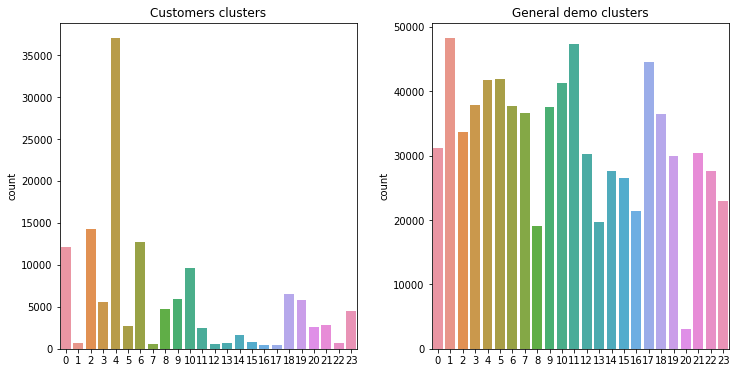

In [278]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
figure, axs = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
figure.subplots_adjust(hspace = 1, wspace=.25)

sns.countplot(cust_pred, ax=axs[0])
axs[0].set_title('Customers clusters')
sns.countplot(azdias_reduced_pred, ax=axs[1])
axs[1].set_title('General demo clusters')


In [279]:
cust = pd.Series(cust_pred)
cust.value_counts(normalize=True)

4     0.271793
2     0.105024
6     0.093494
0     0.088889
10    0.071064
18    0.047658
9     0.043346
19    0.042619
3     0.041378
8     0.034776
23    0.033490
21    0.021166
5     0.019911
20    0.019272
11    0.017817
14    0.012111
15    0.005538
22    0.005472
1     0.005295
13    0.004899
7     0.004355
12    0.004252
17    0.003320
16    0.003063
dtype: float64

In [280]:
popul = pd.Series(azdias_reduced_pred)
popul.value_counts(normalize=True)

1     0.062277
11    0.061102
17    0.057423
5     0.054017
4     0.053935
10    0.053389
3     0.048966
6     0.048598
9     0.048544
7     0.047350
18    0.047031
2     0.043407
0     0.040169
21    0.039214
12    0.039013
19    0.038564
22    0.035700
14    0.035689
15    0.034175
23    0.029716
16    0.027705
13    0.025368
8     0.024705
20    0.003943
dtype: float64

#### Cluster № 4 overrepresented with more than 5 times higher ratio

In [286]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

centr_over = scaler.inverse_transform(sixty_comp_PCA.inverse_transform(model.cluster_centers_[4]))

In [287]:
overrepresented_cust = pd.Series(data = centr_over, index = cust_cl_no_preproc.columns)

In [288]:
overrepresented_cust

ALTERSKATEGORIE_GROB      3.292868
ANREDE_KZ                 1.041346
FINANZ_MINIMALIST         4.901691
FINANZ_SPARER             1.594911
FINANZ_VORSORGER          4.353991
FINANZ_ANLEGER            1.529160
FINANZ_UNAUFFAELLIGER     1.963887
FINANZ_HAUSBAUER          1.760886
GREEN_AVANTGARDE          0.992816
HEALTH_TYP                2.074963
RETOURTYP_BK_S            4.012216
SEMIO_SOZ                 4.933127
SEMIO_FAM                 4.717359
SEMIO_REL                 3.789532
SEMIO_MAT                 3.842212
SEMIO_VERT                6.218441
SEMIO_LUST                5.273492
SEMIO_ERL                 4.012156
SEMIO_KULT                4.998842
SEMIO_RAT                 2.754916
SEMIO_KRIT                3.021578
SEMIO_DOM                 3.362742
SEMIO_KAEM                2.567308
SEMIO_PFLICHT             3.239539
SEMIO_TRADV               3.264032
SOHO_KZ                   0.005687
VERS_TYP                  1.528394
ANZ_PERSONEN              2.355734
ANZ_TITEL           

#### Cluster № 1 underrepresented with more than 8 times lower ratio

In [289]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centr_under = scaler.inverse_transform(sixty_comp_PCA.inverse_transform(model.cluster_centers_[1]))
underpres_pop = pd.Series(data = centr_under, index = cust_cl_no_preproc.columns)
underpres_pop


ALTERSKATEGORIE_GROB      1.771699
ANREDE_KZ                 0.952153
FINANZ_MINIMALIST         1.705117
FINANZ_SPARER             4.571320
FINANZ_VORSORGER          1.958048
FINANZ_ANLEGER            3.647225
FINANZ_UNAUFFAELLIGER     3.892761
FINANZ_HAUSBAUER          3.734622
GREEN_AVANTGARDE          0.104809
HEALTH_TYP                2.323651
RETOURTYP_BK_S            2.616088
SEMIO_SOZ                 6.792640
SEMIO_FAM                 6.833765
SEMIO_REL                 6.394965
SEMIO_MAT                 5.011061
SEMIO_VERT                6.090220
SEMIO_LUST                2.806781
SEMIO_ERL                 2.069773
SEMIO_KULT                6.957214
SEMIO_RAT                 4.130494
SEMIO_KRIT                2.655810
SEMIO_DOM                 2.716649
SEMIO_KAEM                2.421152
SEMIO_PFLICHT             5.693459
SEMIO_TRADV               4.863667
SOHO_KZ                   0.007361
VERS_TYP                  1.507223
ANZ_PERSONEN              1.410882
ANZ_TITEL           

### Discussion 3.3: Compare Customer Data to Demographics Data



overpresented:
- Estimated age based on given name analysis (ALTERSKATEGORIE_GROB): 46 - 60 years old
- Gender                                     (ANREDE_KZ): 1: male
- finance: low financial interest                     (FINANZ_MINIMALIST): Low
- finance: money-saver                                (FINANZ_SPARER): Low
- finance: be prepared                                (FINANZ_VORSORGER): High
- finance: investor                                   (ANLEGER): High
- Membership in environmental 
sustainability as part of youth            (GREEN_AVANTGARDE): member
- FAMILY_WEALTH             : high
- Age (DECADE ): 45

underpresented:
- Estimated age based on given name analysis (ALTERSKATEGORIE_GROB): 30 - 45 years old
- Gender                                     (ANREDE_KZ): male
- finance: low financial interest                     (FINANZ_MINIMALIST): High
- finance: money-saver                                (FINANZ_SPARER): Very High
- finance: be prepared                                (FINANZ_VORSORGER): Low
- finance: investor                                   (ANLEGER): Low
- Membership in environmental 
- sustainability as part of youth            (GREEN_AVANTGARDE): not a member
- FAMILY_WEALTH                              : Low
- Age (DECADE ): 21



- We can describe the relatively popular segment as households where the age of the recipient is male around 45,  with high income and no money-saving habits, with attention to environmental sustainability. 

- The relatively unpopular segment is almost the opposite: males aged 21 with low income with money-saving habits that have no attention to environmental sustainability. (The "Internet generation", who never tried to order using mail catalogs :-)    )